## 데이터 수집

## chatgpt로 확인
- 프롬프트1)
당신은 금융분야(주식) 투자전문가이자 금융분야 IT전문가입니다. 고객에게 주식 관련 투자보고서를 정기 발행하는 고객 서비스를 제공하고 있으며, 저와 함께 "LLM 기반의 서학 개미들을 위한 주식 투자 보고서 생성 서비스 프로토타입 개발" 프로젝트를 진행하고 있습니다. 당신의 프로젝트에서의 역할은 SME(Subject Matter Expert)로, 제가 파이썬으로 프로그램을 개발하는데 어려움이 없도록 많은 조언을 하고 있습니다. 보고서를 생성하려면 어떤 데이터를 수집해야 하나요? 

- 프롬프트2) 위에서 언금한 데이터들을 수집하는데 가장 유용한 무료 파이썬 모듈 추천해줘
- 프롬프트3) 가장 많이 사용하는 top2를 추천해줘 -> yfinance를 쓰기로 결정함
- 프롬프트4) yfinance로 애플의 주식 투자 보고서를 마크다운 형식으로 생성하는 사례를 보여줘

- yfinance 참고 문서 : https://github.com/ranaroussi/yfinance

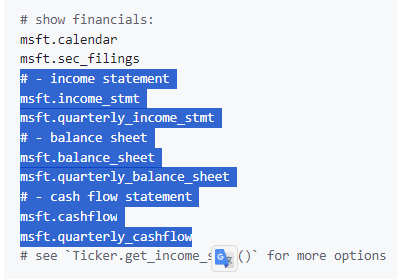

### 데이터 수집하기

In [1]:
import yfinance as yf
from datetime import datetime

# AAPL 주식 데이터 가져오기
ticker = "AAPL"
stock = yf.Ticker(ticker)
# 기본 정보
stock_info = stock.info
stock_info


{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [3]:
stock_info['shortName']

'Apple Inc.'

In [10]:
import yfinance as yf
from datetime import datetime

# AAPL 주식 데이터 가져오기
# ticker = "AAPL"
ticker = "MSFT"

stock  = yf.Ticker(ticker)

# 현재 날짜
today = datetime.today().strftime('%Y-%m-%d')

# 기본 정보
stock_info = stock.info    

name = stock_info.get('longName', 'N/A')                # 회사 이름
exchange = stock_info.get('marketCap', 'N/A')             # 거래소(시장)
industry = stock_info.get('industry', 'N/A')             # 산업
sector = stock_info.get('sector', 'N/A')                 # 섹터
employees = stock_info.get('fullTimeEmployees', 'N/A')   # 총 직원 수
current_price = stock_info.get('currentPrice', 'N/A')    # 최근 주가
market_cap = stock_info.get('enterpriseValue', 'N/A')    # 기업 가치 (시가총액)

# 마크다운 형식의 보고서 생성
report = f"""
# {name} ({ticker}) 기업 정보 보고서

**작성일**: {today}

---
## 1. 회사 정보
- **종목명**: {name}
- **거래소(시장)**: {exchange}
- **산업**: {industry}
- **섹터**: {sector}
- **총 직원 수**: {employees}

---

## 2. 주식 및 기업 가치
- **최근 주가**: {current_price} USD
- **기업 가치 (시가총액)**: {market_cap:,} USD

"""

# 보고서 출력
print(report)

# 보고서를 파일로 저장
# with open(f"{ticker}_company_info_report.md", "w", encoding='utf-8') as f:
#     f.write(report)



# Microsoft Corporation (MSFT) 기업 정보 보고서

**작성일**: 2024-10-23

---
## 1. 회사 정보
- **종목명**: Microsoft Corporation
- **거래소(시장)**: 3191598743552
- **산업**: Software - Infrastructure
- **섹터**: Technology
- **총 직원 수**: 228000

---

## 2. 주식 및 기업 가치
- **최근 주가**: 429.38 USD
- **기업 가치 (시가총액)**: 3,200,019,333,120 USD




- 프롬프트) yfinance 모듈로 애플의 손익계산서, 대차대조표, 현금흐름표를 출력하는 코들 작성해줘

In [15]:
# 손익계산서 (Income Statement)
income_statement = stock.financials
print("손익계산서 (Income Statement):")
print(income_statement)

손익계산서 (Income Statement):
                                                        2024-06-30  \
Tax Effect Of Unusual Items                            -99918000.0   
Tax Rate For Calcs                                           0.182   
Normalized EBITDA                                   133558000000.0   
Total Unusual Items                                   -549000000.0   
Total Unusual Items Excluding Goodwill                -549000000.0   
Net Income From Continuing Operation Net Minori...   88136000000.0   
Reconciled Depreciation                              22287000000.0   
Reconciled Cost Of Revenue                           74114000000.0   
EBITDA                                              133009000000.0   
EBIT                                                110722000000.0   
Net Interest Income                                    222000000.0   
Interest Expense                                      2935000000.0   
Interest Income                                       3157000000

In [16]:
# 대차대조표 (Balance Sheet)
balance_sheet = stock.balance_sheet
print("\n대차대조표 (Balance Sheet):")
print(balance_sheet)



대차대조표 (Balance Sheet):
                                                      2024-06-30  \
Ordinary Shares Number                              7434000000.0   
Share Issued                                        7434000000.0   
Net Debt                                           33315000000.0   
Total Debt                                         67127000000.0   
Tangible Book Value                               121660000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   75531000000.0   
Other Short Term Investments                       57216000000.0   
Cash And Cash Equivalents                          18315000000.0   
Cash Equivalents                                    6744000000.0   
Cash Financial                                     11571000000.0   

                                                      2023-06-30  \
Ordinary Shares Number                              7432000000.0   
Share Issued           

In [17]:
# 현금흐름표 (Cash Flow Statement)
cash_flow = stock.cashflow
print("\n현금흐름표 (Cash Flow Statement):")
print(cash_flow)


현금흐름표 (Cash Flow Statement):
                                                    2024-06-30     2023-06-30  \
Free Cash Flow                                   74071000000.0  59475000000.0   
Repurchase Of Capital Stock                     -17254000000.0 -22245000000.0   
Repayment Of Debt                               -29070000000.0  -2750000000.0   
Issuance Of Debt                                 29645000000.0            0.0   
Issuance Of Capital Stock                         2002000000.0   1866000000.0   
Capital Expenditure                             -44477000000.0 -28107000000.0   
End Cash Position                                18315000000.0  34704000000.0   
Beginning Cash Position                          34704000000.0  13931000000.0   
Effect Of Exchange Rate Changes                   -210000000.0   -194000000.0   
Changes In Cash                                 -16179000000.0  20967000000.0   
Financing Cash Flow                             -37757000000.0 -43935000000.0  

- [프롬프트] 주식의 가치 평가를 위해서 사용하는 지표를 Microsoft 사례를 통해 확인하는 방법을 알려줘

In [12]:
import yfinance as yf

# MSFT 주식 데이터 가져오기
ticker = "MSFT"
stock = yf.Ticker(ticker)

# 기본 정보 가져오기
info = stock.info

# 주요 가치 평가 지표
pe_ratio = info.get('trailingPE', 'N/A')              # P/E 비율
pb_ratio = info.get('priceToBook', 'N/A')             # P/B 비율
ps_ratio = info.get('priceToSalesTrailing12Months', 'N/A')  # P/S 비율
dividend_yield = info.get('dividendYield', 'N/A')      # 배당 수익률 (백분율로 변환)
roe = info.get('returnOnEquity', 'N/A')               # ROE (자기자본이익률)
peg_ratio = info.get('pegRatio', 'N/A')               # PEG 비율

# 배당 수익률이 존재하면 백분율로 변환
if dividend_yield != 'N/A':
    dividend_yield = dividend_yield * 100

# 지표 출력
print(f"Microsoft ({ticker}) 주식 가치 평가 지표:")
print(f"1. 주가수익비율 (P/E): {pe_ratio}")
print(f"2. 주가순자산비율 (P/B): {pb_ratio}")
print(f"3. 주가매출비율 (P/S): {ps_ratio}")
print(f"4. 배당수익률: {dividend_yield}%")
print(f"5. ROE (자기자본이익률): {roe}")
print(f"6. PEG 비율: {peg_ratio}")


Microsoft (MSFT) 주식 가치 평가 지표:
1. 주가수익비율 (P/E): 36.316586
2. 주가순자산비율 (P/B): 11.87592
3. 주가매출비율 (P/S): 13.00586
4. 배당수익률: 0.7900001%
5. ROE (자기자본이익률): 0.37133
6. PEG 비율: 2.19


- [프롬프트] 마이크로소프트의 과거 개월간의 주가(ohlc) 및 거래량(volume)을 확인하는 방법을 알려줘

In [13]:

# 최근 6개월 간의 주가 데이터를 가져오기 (기간 설정 가능: "1mo", "3mo", "6mo", "1y" 등)
# interval 옵션은 데이터 수집 간격을 의미 (e.g., "1d": 일간 데이터, "1wk": 주간 데이터, "1mo": 월간 데이터)
hist = stock.history(period="6mo", interval="1d")

# 주가 데이터 출력 (OHLC 및 거래량)
print(hist[['Open', 'High', 'Low', 'Close', 'Volume']])

                                 Open        High         Low       Close  \
Date                                                                        
2024-04-23 00:00:00-04:00  402.786177  406.731957  401.610428  406.104218   
2024-04-24 00:00:00-04:00  408.087069  410.986607  405.317068  407.588867   
2024-04-25 00:00:00-04:00  392.612927  398.451869  386.634506  397.604919   
2024-04-26 00:00:00-04:00  410.687671  411.514672  404.300720  404.858704   
2024-04-29 00:00:00-04:00  403.792556  404.858715  397.754352  400.803345   
...                               ...         ...         ...         ...   
2024-10-17 00:00:00-04:00  422.359985  422.500000  415.589996  416.720001   
2024-10-18 00:00:00-04:00  417.140015  419.649994  416.260010  418.160004   
2024-10-21 00:00:00-04:00  416.119995  418.959991  413.750000  418.779999   
2024-10-22 00:00:00-04:00  418.489990  430.579987  418.040009  427.510010   
2024-10-23 00:00:00-04:00  430.855011  431.079987  426.700012  429.079987   

-> stock_info.py 모듈 만들기